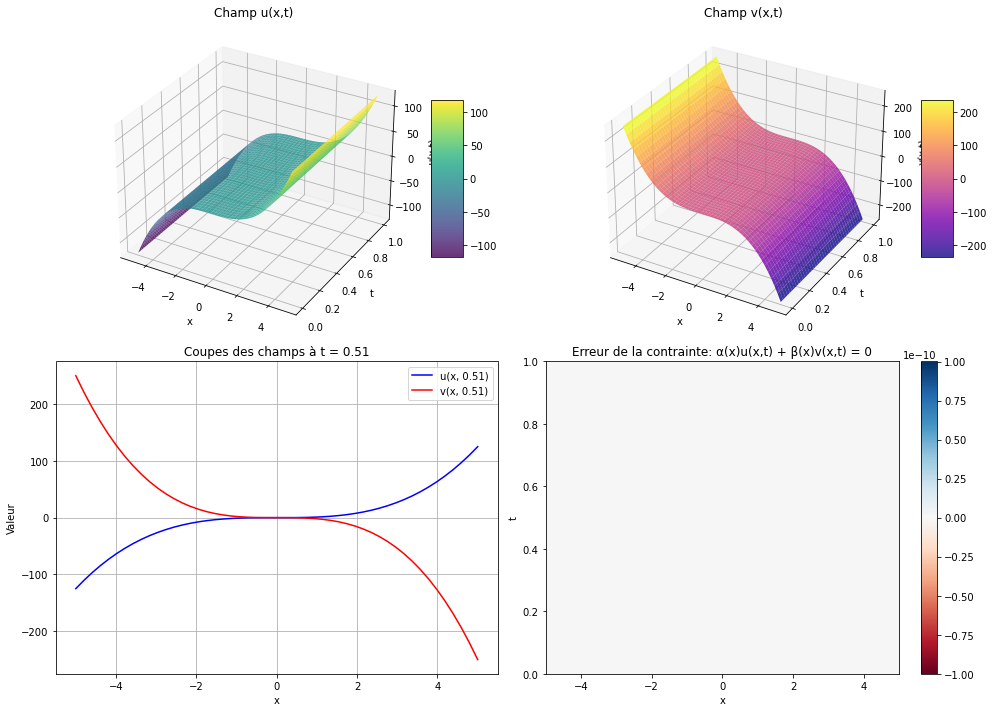

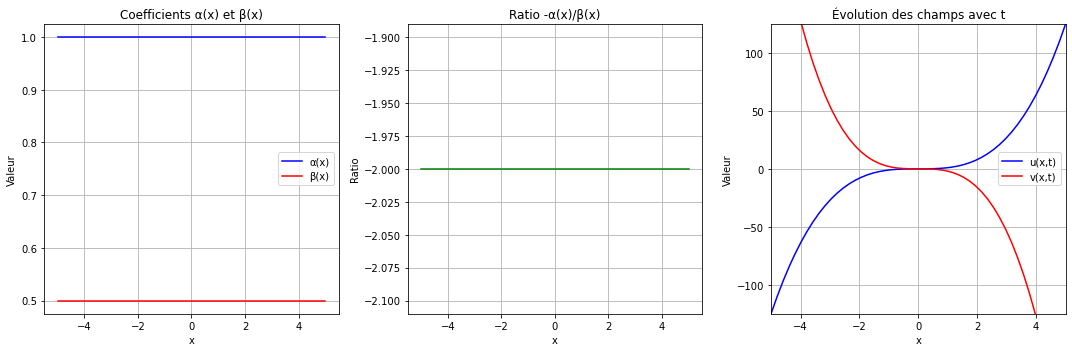

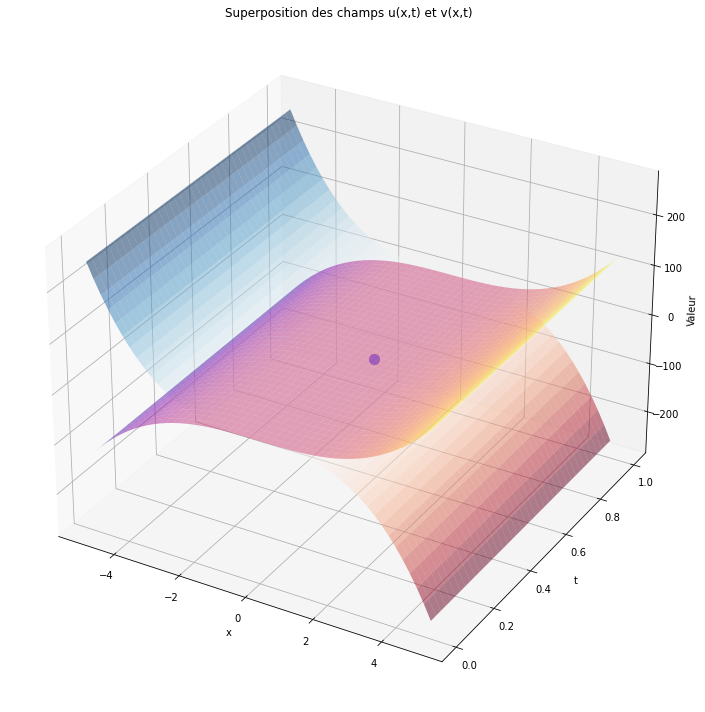

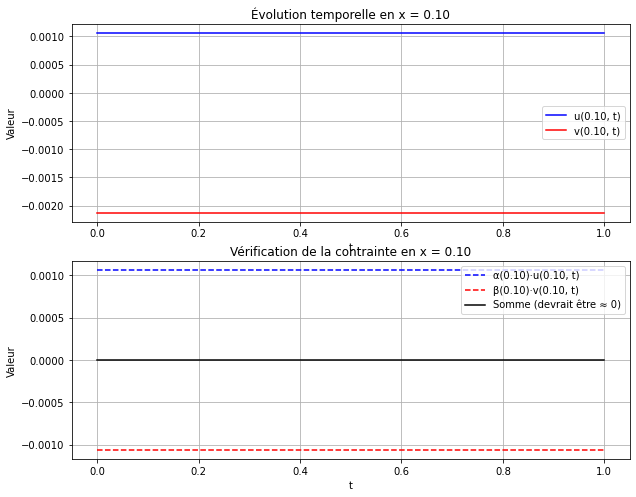

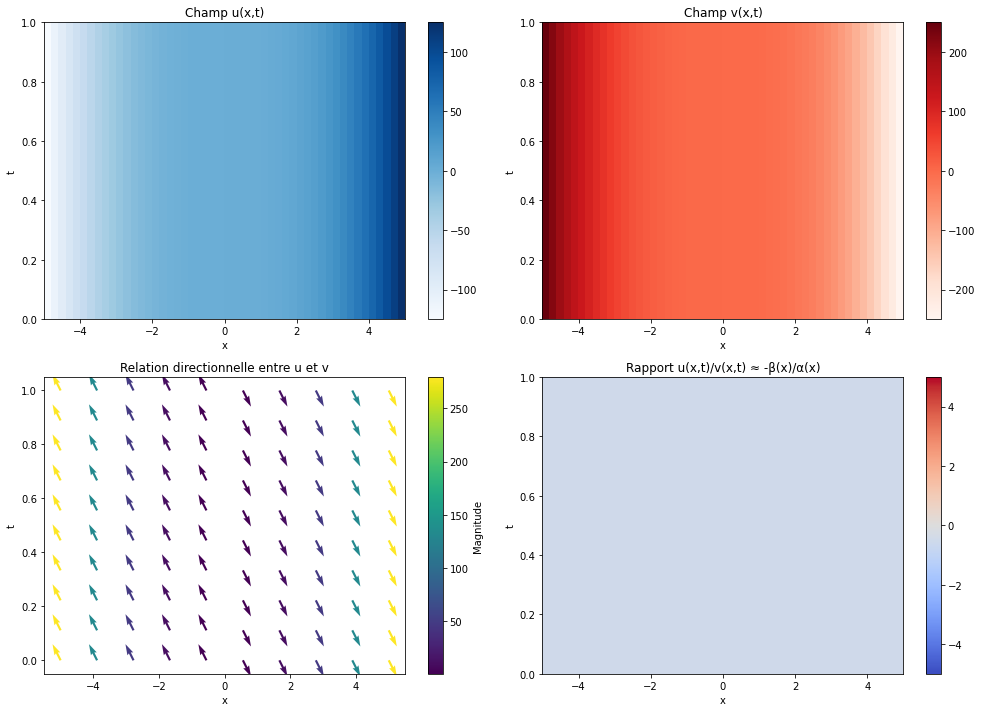

<Figure size 432x288 with 0 Axes>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.animation as animation
from matplotlib.colors import Normalize

# Définition des paramètres
Nx = 50  # Nombre de points en x
Nt = 40  # Nombre de points en t
x_min, x_max = -5, 5
t_min, t_max = 0, 1

# Création des grilles
x = np.linspace(x_min, x_max, Nx)
t = np.linspace(t_min, t_max, Nt)
X, T = np.meshgrid(x, t)

# Définition des fonctions alpha(x) et beta(x)
def alpha(x):
    return 1 #+ 0.5 * np.sin(2 * np.pi * x)

def beta(x):
    return 0.5 #+ 0.3 * np.cos(3 * np.pi * x)

# Création d'un champ u(x,t) arbitraire
def u(x, t):
    return x**3 #np.log(x+1)/(x+1) #np.sin(np.pi * x) * np.cos(2 * np.pi * t)  #+ 0.5 * np.sin(3 * np.pi * x) * np.sin(np.pi * t)

# Calcul de v(x,t) à partir de la contrainte alpha(x)u(x,t) + beta(x)v(x,t) = 0
def v(x, t):
    return -alpha(x) * u(x, t) / beta(x)

# Calcul des valeurs des champs
U = np.zeros((Nt, Nx))
V = np.zeros((Nt, Nx))
A = np.zeros(Nx)
B = np.zeros(Nx)

for i in range(Nx):
    A[i] = alpha(x[i])
    B[i] = beta(x[i])
    for j in range(Nt):
        U[j, i] = u(x[i], t[j])
        V[j, i] = v(x[i], t[j])

# Vérification de la contrainte
def verification_contrainte(x_idx, t_idx):
    contrainte = A[x_idx] * U[t_idx, x_idx] + B[x_idx] * V[t_idx, x_idx]
    return contrainte

# 1. Visualisation 3D des champs u(x,t) et v(x,t)
fig = plt.figure(figsize=(14, 10))

# Champ u(x,t)
ax1 = fig.add_subplot(221, projection='3d')
surf1 = ax1.plot_surface(X, T, U, cmap=cm.viridis, alpha=0.8)
ax1.set_xlabel('x')
ax1.set_ylabel('t')
ax1.set_zlabel('u(x,t)')
ax1.set_title('Champ u(x,t)')
fig.colorbar(surf1, ax=ax1, shrink=0.5, aspect=5)

# Champ v(x,t)
ax2 = fig.add_subplot(222, projection='3d')
surf2 = ax2.plot_surface(X, T, V, cmap=cm.plasma, alpha=0.8)
ax2.set_xlabel('x')
ax2.set_ylabel('t')
ax2.set_zlabel('v(x,t)')
ax2.set_title('Champ v(x,t)')
fig.colorbar(surf2, ax=ax2, shrink=0.5, aspect=5)

# 2. Visualisation 2D des champs à t fixé
t_idx = Nt // 2  # Milieu de l'intervalle de temps
t_val = t[t_idx]

ax3 = fig.add_subplot(223)
ax3.plot(x, U[t_idx, :], 'b-', label=f'u(x, {t_val:.2f})')
ax3.plot(x, V[t_idx, :], 'r-', label=f'v(x, {t_val:.2f})')
ax3.set_xlabel('x')
ax3.set_ylabel('Valeur')
ax3.set_title(f'Coupes des champs à t = {t_val:.2f}')
ax3.legend()
ax3.grid(True)

# 3. Visualisation de la fonction contrainte alpha(x)u(x,t) + beta(x)v(x,t)
contrainte = np.zeros((Nt, Nx))
for i in range(Nx):
    for j in range(Nt):
        contrainte[j, i] = A[i] * U[j, i] + B[i] * V[j, i]

ax4 = fig.add_subplot(224)
im = ax4.imshow(contrainte, extent=[x_min, x_max, t_min, t_max], 
                origin='lower', cmap='RdBu', aspect='auto',
                norm=Normalize(vmin=-1e-10, vmax=1e-10))
ax4.set_xlabel('x')
ax4.set_ylabel('t')
ax4.set_title('Erreur de la contrainte: α(x)u(x,t) + β(x)v(x,t) = 0')
fig.colorbar(im, ax=ax4)

plt.tight_layout()
plt.show()

# 4. Création d'une figure supplémentaire pour visualiser l'évolution des champs avec le temps
fig2, axes = plt.subplots(1, 3, figsize=(15, 5))

# Coefficients alpha(x) et beta(x)
axes[0].plot(x, A, 'b-', label='α(x)')
axes[0].plot(x, B, 'r-', label='β(x)')
axes[0].set_xlabel('x')
axes[0].set_ylabel('Valeur')
axes[0].set_title('Coefficients α(x) et β(x)')
axes[0].legend()
axes[0].grid(True)

# Ratio -α(x)/β(x)
ratio = -A / B
axes[1].plot(x, ratio, 'g-')
axes[1].set_xlabel('x')
axes[1].set_ylabel('Ratio')
axes[1].set_title('Ratio -α(x)/β(x)')
axes[1].grid(True)

# Animation préparation (Pour montrer l'évolution dans le temps)
line1, = axes[2].plot([], [], 'b-', label='u(x,t)')
line2, = axes[2].plot([], [], 'r-', label='v(x,t)')
axes[2].set_xlabel('x')
axes[2].set_ylabel('Valeur')
axes[2].set_title('Évolution des champs avec t')
axes[2].legend()
axes[2].grid(True)
axes[2].set_xlim(x_min, x_max)
axes[2].set_ylim(np.min(U) - 0.1, np.max(U) + 0.1)

def animate(i):
    line1.set_data(x, U[i, :])
    line2.set_data(x, V[i, :])
    return line1, line2

ani = animation.FuncAnimation(fig2, animate, frames=Nt, interval=100, blit=True)

plt.tight_layout()
plt.show()

# 5. Graphique superposant les deux champs dans l'espace (x,t)
fig3 = plt.figure(figsize=(14, 10))

# Création d'une grille 3D pour la visualisation vectorielle
x_grid = np.linspace(x_min, x_max, 15)
t_grid = np.linspace(t_min, t_max, 15)
X_grid, T_grid = np.meshgrid(x_grid, t_grid)
U_grid = np.zeros_like(X_grid)
V_grid = np.zeros_like(X_grid)

for i in range(len(x_grid)):
    for j in range(len(t_grid)):
        U_grid[j, i] = u(x_grid[i], t_grid[j])
        V_grid[j, i] = v(x_grid[i], t_grid[j])

# Création de sous-graphiques
ax_sup = fig3.add_subplot(111, projection='3d')

# Surfaces pour u(x,t) et v(x,t) avec transparence
surf_u = ax_sup.plot_surface(X, T, U, cmap=cm.plasma, alpha=0.5, label='u(x,t)')
surf_v = ax_sup.plot_surface(X, T, V, cmap=cm.RdBu, alpha=0.5, label='v(x,t)')

# Améliorer la lisibilité
ax_sup.set_xlabel('x')
ax_sup.set_ylabel('t')
ax_sup.set_zlabel('Valeur')
ax_sup.set_title('Superposition des champs u(x,t) et v(x,t)')

# Ajouter un point de référence pour la légende
x_point, t_point = 0.5, 0.5
u_point = u(x_point, t_point)
v_point = v(x_point, t_point)
ax_sup.scatter([x_point], [t_point], [u_point], color='blue', s=100, label='u(x,t)')
ax_sup.scatter([x_point], [t_point], [v_point], color='red', s=100, label='v(x,t)')

# Ajouter une ligne reliant les points et montrant la contrainte
ax_sup.plot([x_point, x_point], [t_point, t_point], [u_point, v_point], 'k--', linewidth=2)

# Ajouter la légende
#ax_sup.legend()

plt.tight_layout()
plt.show()

# 6. Création d'une figure pour visualiser la contrainte en différents points
fig4, axes = plt.subplots(2, 1, figsize=(10, 8))

# Évolution de u et v en un point x fixé
x_idx = Nx // 2
x_val = x[x_idx]

axes[0].plot(t, U[:, x_idx], 'b-', label=f'u({x_val:.2f}, t)')
axes[0].plot(t, V[:, x_idx], 'r-', label=f'v({x_val:.2f}, t)')
axes[0].set_xlabel('t')
axes[0].set_ylabel('Valeur')
axes[0].set_title(f'Évolution temporelle en x = {x_val:.2f}')
axes[0].legend()
axes[0].grid(True)

# Vérification graphique de la contrainte
produit_u = A[x_idx] * U[:, x_idx]
produit_v = B[x_idx] * V[:, x_idx]
somme = produit_u + produit_v

axes[1].plot(t, produit_u, 'b--', label=f'α({x_val:.2f})·u({x_val:.2f}, t)')
axes[1].plot(t, produit_v, 'r--', label=f'β({x_val:.2f})·v({x_val:.2f}, t)')
axes[1].plot(t, somme, 'k-', label='Somme (devrait être ≈ 0)')
axes[1].set_xlabel('t')
axes[1].set_ylabel('Valeur')
axes[1].set_title(f'Vérification de la contrainte en x = {x_val:.2f}')
axes[1].legend()
axes[1].grid(True)

# 7. Création d'une figure 2D montrant la relation des champs dans le plan (x,t)
fig5, axes = plt.subplots(2, 2, figsize=(14, 10))

# Cartes de chaleur des deux champs
im1 = axes[0, 0].imshow(U, extent=[x_min, x_max, t_min, t_max], origin='lower', 
                        aspect='auto', cmap='Blues')
axes[0, 0].set_xlabel('x')
axes[0, 0].set_ylabel('t')
axes[0, 0].set_title('Champ u(x,t)')
fig5.colorbar(im1, ax=axes[0, 0])

im2 = axes[0, 1].imshow(V, extent=[x_min, x_max, t_min, t_max], origin='lower', 
                        aspect='auto', cmap='Reds')
axes[0, 1].set_xlabel('x')
axes[0, 1].set_ylabel('t')
axes[0, 1].set_title('Champ v(x,t)')
fig5.colorbar(im2, ax=axes[0, 1])

# Champs de vecteurs montrant la direction et la magnitude de (u,v) à différents points
x_quiver = np.linspace(x_min, x_max, 10)
t_quiver = np.linspace(t_min, t_max, 10)
X_quiver, T_quiver = np.meshgrid(x_quiver, t_quiver)
U_quiver = np.zeros_like(X_quiver)
V_quiver = np.zeros_like(X_quiver)

for i in range(len(x_quiver)):
    for j in range(len(t_quiver)):
        U_quiver[j, i] = u(x_quiver[i], t_quiver[j])
        V_quiver[j, i] = v(x_quiver[i], t_quiver[j])

# Normaliser les vecteurs pour mieux visualiser la direction
magnitude = np.sqrt(U_quiver**2 + V_quiver**2)
U_norm = U_quiver / (magnitude + 1e-10)  # Éviter division par zéro
V_norm = V_quiver / (magnitude + 1e-10)

# Tracer les vecteurs normalisés avec la couleur basée sur la magnitude
quiver = axes[1, 0].quiver(X_quiver, T_quiver, U_norm, V_norm, magnitude, 
                           cmap='viridis', scale=20)
axes[1, 0].set_xlabel('x')
axes[1, 0].set_ylabel('t')
axes[1, 0].set_title('Relation directionnelle entre u et v')
fig5.colorbar(quiver, ax=axes[1, 0], label='Magnitude')

# Visualisation du rapport u/v
ratio_uv = U / (V + 1e-10)  # Éviter division par zéro
im3 = axes[1, 1].imshow(ratio_uv, extent=[x_min, x_max, t_min, t_max], origin='lower', 
                        aspect='auto', cmap='coolwarm', 
                        norm=Normalize(vmin=-5, vmax=5))
axes[1, 1].set_xlabel('x')
axes[1, 1].set_ylabel('t')
axes[1, 1].set_title('Rapport u(x,t)/v(x,t) ≈ -β(x)/α(x)')
fig5.colorbar(im3, ax=axes[1, 1])

plt.tight_layout()
plt.show()

plt.tight_layout()
plt.show()

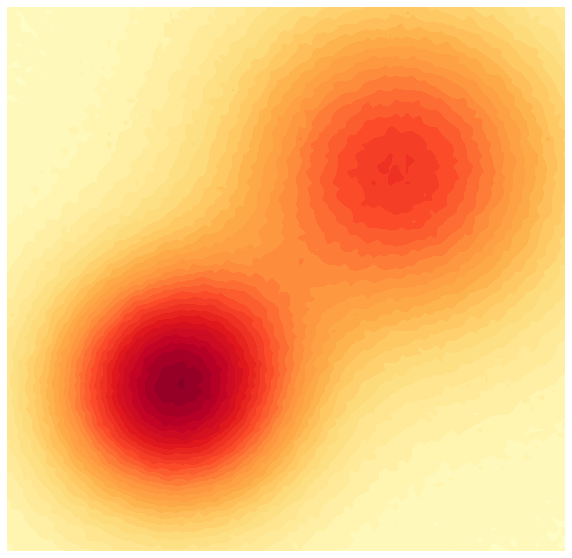

In [83]:
def f_xt(X,Y):
    return 0.7 * np.exp(-((X - 0.3)**2 + (Y - 0.3)**2) / 0.05) + \
    0.5 * np.exp(-((X - 0.7)**2 + (Y - 0.7)**2) / 0.1) #+ \
   # 0.2 * np.sin(X * 6 * np.pi) * np.cos(Y * 4 * np.pi)#0.05 + 0.2 * np.exp(-((XX - 0.5)**2 + (YY - 0.4)**2) / 0.15)

# Définition des paramètres
Nx = 100  # Nombre de points en x
Nt = 100  # Nombre de points en t
x_min, x_max = 0, 1
t_min, t_max = 0, 1

# Création des grilles
x = np.linspace(x_min, x_max, Nx)
t = np.linspace(t_min, t_max, Nt)
X, T = np.meshgrid(x, t)


zz = f_xt(X,T)
plt.figure(figsize=(10,10))
plt.contourf(X,T,zz+0.005*np.random.randn(100,100),30, cmap='YlOrRd') #imshow(zz)
#plt.imshow(zz,cmap='YlOrRd')
plt.axis("off")
plt.savefig("field2.png")
plt.show()

In [77]:
zz.shape


(100, 100)